In [ ]:
# # Linear Regression Analysis

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('C:\\Users\\coep\\Downloads\\day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.shape

(730, 16)

Deleting unwanted columns(instant,holiday,atemp,casual,registered)

In [5]:
df=df.drop(['instant','holiday','atemp','casual','registered'],axis=1)
df.head()

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,03-01-2018,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


In [6]:
df.shape

(730, 11)

In [7]:
df.describe()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


# EDA

<AxesSubplot:xlabel='temp', ylabel='cnt'>

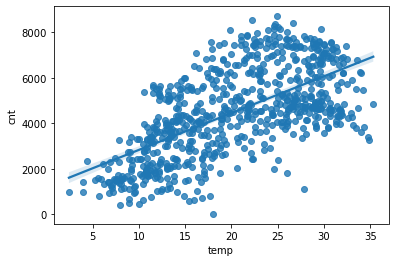

In [8]:
sns.regplot(x= 'temp', y='cnt', data=df)

<Figure size 2160x864 with 0 Axes>

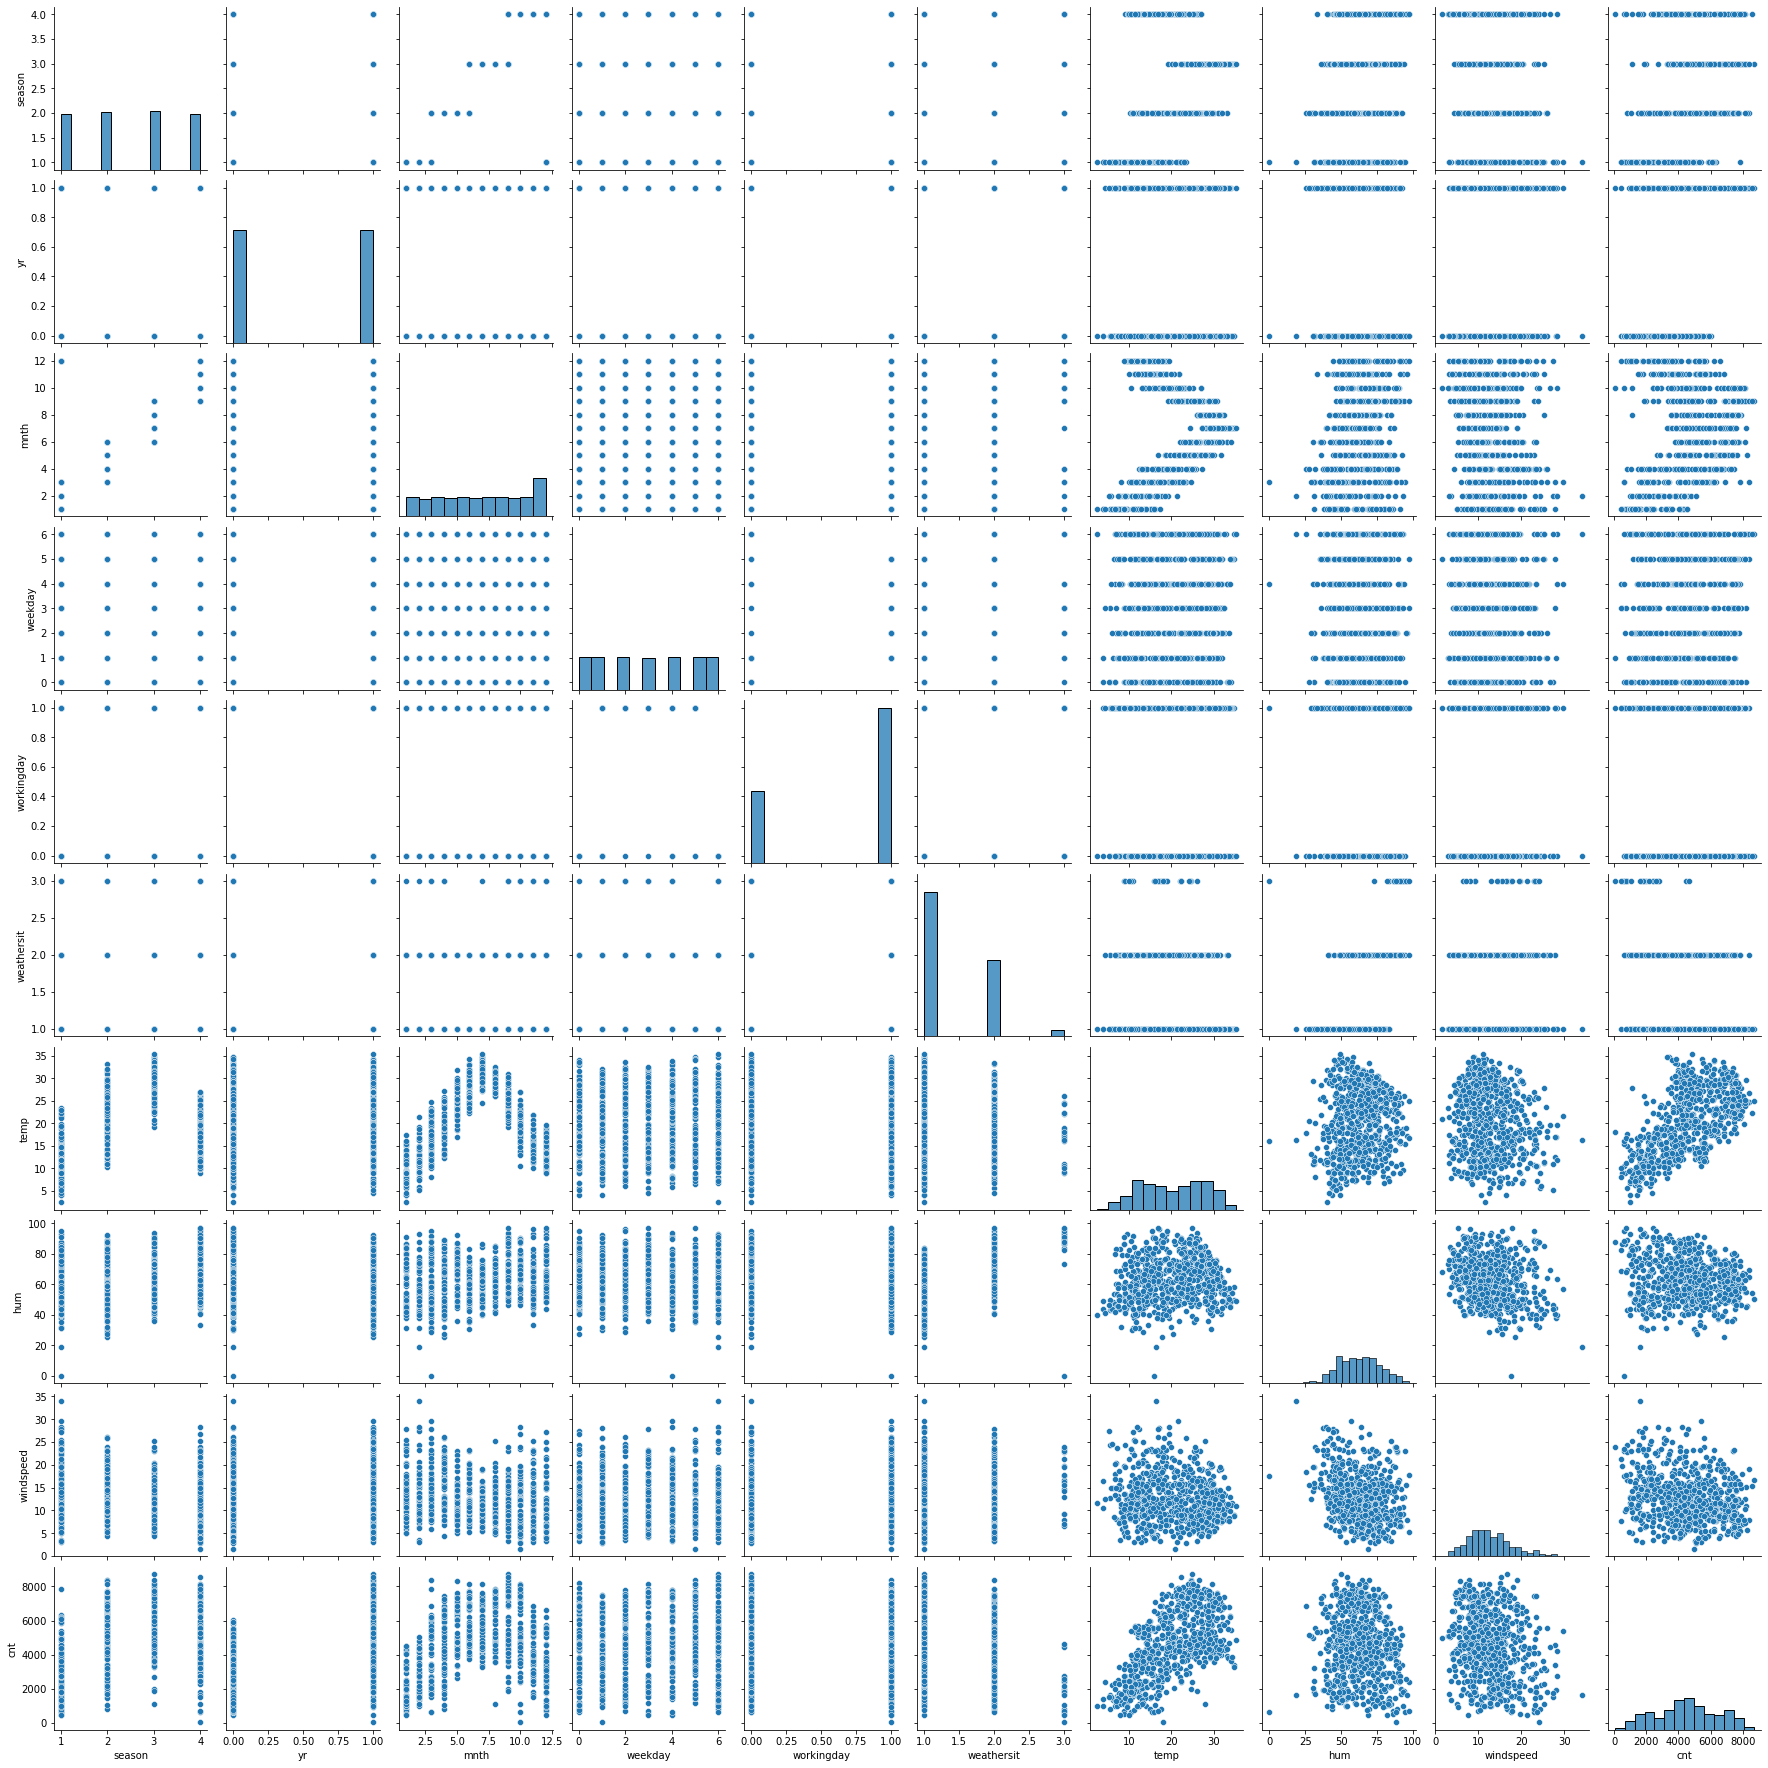

In [9]:
plt.figure(figsize=(30, 12))
sns.pairplot(df)

In [10]:
cor=df.corr()
cor

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.003081,0.013762,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,-0.005466,-0.002945,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.009523,-0.004688,0.045613,0.219083,0.224937,-0.208013,0.278191
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,1.000000,0.035800,0.031112,-0.000168,-0.052290,0.014283,0.067534
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,0.035800,1.000000,0.060236,0.053470,0.023202,-0.018666,0.062542
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,0.031112,0.060236,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.000168,0.053470,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.052290,0.023202,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.014283,-0.018666,0.039769,-0.158186,-0.248506,1.000000,-0.235132
cnt,4.045838e-01,5.697285e-01,2.781909e-01,0.067534,0.062542,-0.295929,0.627044,-0.098543,-0.235132,1.000000


<AxesSubplot:>

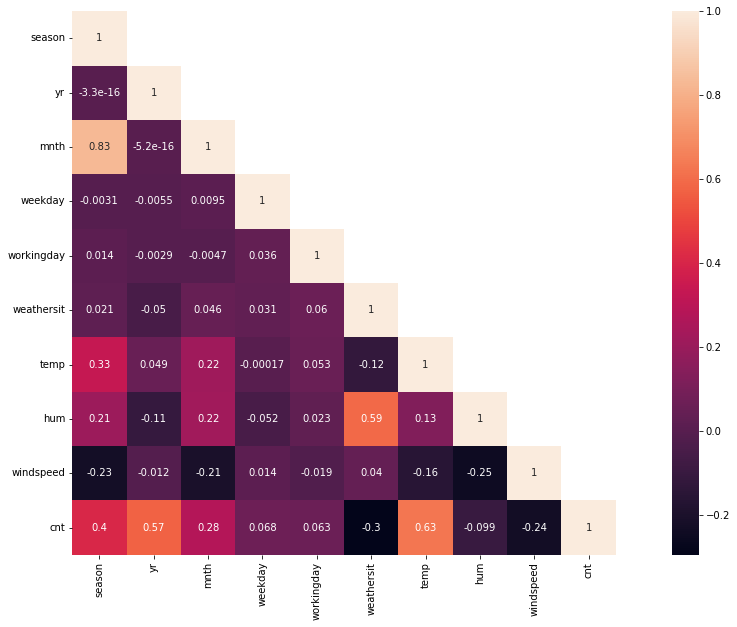

In [11]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor, mask=mask,vmax=1, square=True,annot=True)

From heat map it is understood that temp is correlated with temperature with maximum value of 0.63 after year.

Spliting year as 2018 and 2019 separately

In [12]:
df['year'] = pd.DatetimeIndex(df['dteday']).year
df['month'] = pd.DatetimeIndex(df['dteday']).month
df.head()

C:\Users\coep\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\coep\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\coep\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dtarr = DatetimeArray._from_sequence_not_strict(
C:\Users\coep\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py:327: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent pars

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,01-01-2018,1,0,1,6,0,2,14.110847,80.5833,10.749882,985,2018,1
1,02-01-2018,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,2018,2
2,03-01-2018,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349,2018,3
3,04-01-2018,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562,2018,4
4,05-01-2018,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600,2018,5


since year and month is extracted there is no need of dteday column so I can delete it

In [13]:
df = df.drop(['dteday'],axis=1)
df.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985,2018,1
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,2018,2
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349,2018,3
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562,2018,4
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600,2018,5


In [17]:
status = pd.get_dummies(df['year'])
status.head()
df1 = pd.concat([df, status], axis = 1)
df1

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,month,2018,2019
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985,2018,1,1,0
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,2018,2,1,0
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349,2018,3,1,0
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562,2018,4,1,0
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600,2018,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,4,1,2,10.420847,65.2917,23.458911,2114,2019,12,0,1
726,1,1,12,5,1,2,10.386653,59.0000,10.416557,3095,2019,12,0,1
727,1,1,12,6,0,2,10.386653,75.2917,8.333661,1341,2019,12,0,1
728,1,1,12,0,0,1,10.489153,48.3333,23.500518,1796,2019,12,0,1


In [18]:
df1 = df1.drop(['year'], axis=1)
df1

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,2018,2019
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985,1,1,0
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,2,1,0
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349,3,1,0
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562,4,1,0
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,4,1,2,10.420847,65.2917,23.458911,2114,12,0,1
726,1,1,12,5,1,2,10.386653,59.0000,10.416557,3095,12,0,1
727,1,1,12,6,0,2,10.386653,75.2917,8.333661,1341,12,0,1
728,1,1,12,0,0,1,10.489153,48.3333,23.500518,1796,12,0,1


 Dummy variables for seasons : 
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [19]:
status = pd.get_dummies(df1['season'])
status.head()
df2 = pd.concat([df1, status], axis = 1)
df2

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,2018,2019,1,2,3,4
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985,1,1,0,1,0,0,0
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801,2,1,0,1,0,0,0
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349,3,1,0,1,0,0,0
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562,4,1,0,1,0,0,0
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600,5,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,4,1,2,10.420847,65.2917,23.458911,2114,12,0,1,1,0,0,0
726,1,1,12,5,1,2,10.386653,59.0000,10.416557,3095,12,0,1,1,0,0,0
727,1,1,12,6,0,2,10.386653,75.2917,8.333661,1341,12,0,1,1,0,0,0
728,1,1,12,0,0,1,10.489153,48.3333,23.500518,1796,12,0,1,1,0,0,0


In [20]:
df3=df2.drop(['season','yr','mnth'],axis=1)
df3

,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,2018,2019,1,2,3,4
0,6,0,2,14.110847,80.5833,10.749882,985,1,1,0,1,0,0,0
1,0,0,2,14.902598,69.6087,16.652113,801,2,1,0,1,0,0,0
2,1,1,1,8.050924,43.7273,16.636703,1349,3,1,0,1,0,0,0
3,2,1,1,8.200000,59.0435,10.739832,1562,4,1,0,1,0,0,0
4,3,1,1,9.305237,43.6957,12.522300,1600,5,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,4,1,2,10.420847,65.2917,23.458911,2114,12,0,1,1,0,0,0
726,5,1,2,10.386653,59.0000,10.416557,3095,12,0,1,1,0,0,0
727,6,0,2,10.386653,75.2917,8.333661,1341,12,0,1,1,0,0,0
728,0,0,1,10.489153,48.3333,23.500518,1796,12,0,1,1,0,0,0


In [21]:
X = df3['cnt']
y = df3['temp']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.70,random_state=100)
X_train.shape

(510,)

Building a linear model

In [22]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,cnt
576,1.0,7216
426,1.0,4066
728,1.0,1796
482,1.0,4220
111,1.0,1683


In [23]:
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    9.085549
cnt      0.002457
dtype: float64

In [26]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           2.46e-61
Time:                        14:50:20   Log-Likelihood:                -1608.9
No. Observations:                 510   AIC:                             3222.
Df Residuals:                     508   BIC:                             3230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0855      0.632     14.384      0.000       7.845      10.327
cnt            0.0025      0.000     19.026      0.000       0.002       0.003
==============================================================================
Omnibus:                       20.960   Durbin-Watson:                   2.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.180
Skew:                           0.416   Prob(JB):                     6.84e-05
Kurtosis:                       2.542   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
np.random.seed(0)
df_train, df_test = train_test_split(df3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
scaler = MinMaxScaler()
## Applying scaler to all variables except 0-1 variables
num_vars = ['temp', 'weathersit', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,2018,2019,1,2,3,4
653,2,1,0.0,0.509887,55.8333,12.208807,0.864243,10,0,1,0,0,0,1
576,2,1,0.0,0.815169,70.4167,11.083475,0.827658,7,0,1,0,0,1,0
426,6,0,0.5,0.442393,62.1250,10.792293,0.465255,3,0,1,1,0,0,0
728,0,0,0.0,0.245101,48.3333,23.500518,0.204096,12,0,1,1,0,0,0
482,6,0,0.5,0.395666,48.9583,8.708325,0.482973,4,0,1,0,1,0,0


In [31]:
cor=df_train.corr()
cor

,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,2018,2019,1,2,3,4
weekday,1.000000,-0.007524,0.055162,-0.004533,-0.049729,0.023804,0.032137,-0.022282,0.041769,-0.041769,0.025440,-0.015325,0.027223,-0.037700
workingday,-0.007524,1.000000,0.048453,0.067787,0.031989,-0.043176,0.092320,0.022003,-0.031808,0.031808,-0.037932,0.043274,0.050976,-0.057297
weathersit,0.055162,0.048453,1.000000,-0.100549,0.568882,0.027311,-0.292329,-0.011135,0.050964,-0.050964,-0.015402,0.006291,-0.080327,0.090774
temp,-0.004533,0.067787,-0.100549,1.000000,0.155415,-0.187396,0.643517,0.096910,-0.107288,0.107288,-0.605988,0.125582,0.697524,-0.233697
hum,-0.049729,0.031989,0.568882,0.155415,1.000000,-0.266895,-0.059993,0.062023,0.084792,-0.084792,-0.201134,-0.013216,0.040371,0.171579
windspeed,0.023804,-0.043176,0.027311,-0.187396,-0.266895,1.000000,-0.253794,-0.043991,0.001108,-0.001108,0.180743,0.110089,-0.194690,-0.090649
cnt,0.032137,0.092320,-0.292329,0.643517,-0.059993,-0.253794,1.000000,0.143416,-0.591508,0.591508,-0.548871,0.134343,0.371606,0.032636
month,-0.022282,0.022003,-0.011135,0.096910,0.062023,-0.043991,0.143416,1.000000,-0.006088,0.006088,-0.266037,-0.221859,0.081703,0.401429
2018,0.041769,-0.031808,0.050964,-0.107288,0.084792,0.001108,-0.591508,-0.006088,1.000000,-1.000000,0.036320,-0.013856,-0.044102,0.022638
2019,-0.041769,0.031808,-0.050964,0.107288,-0.084792,-0.001108,0.591508,0.006088,-1.000000,1.000000,-0.036320,0.013856,0.044102,-0.022638


<AxesSubplot:>

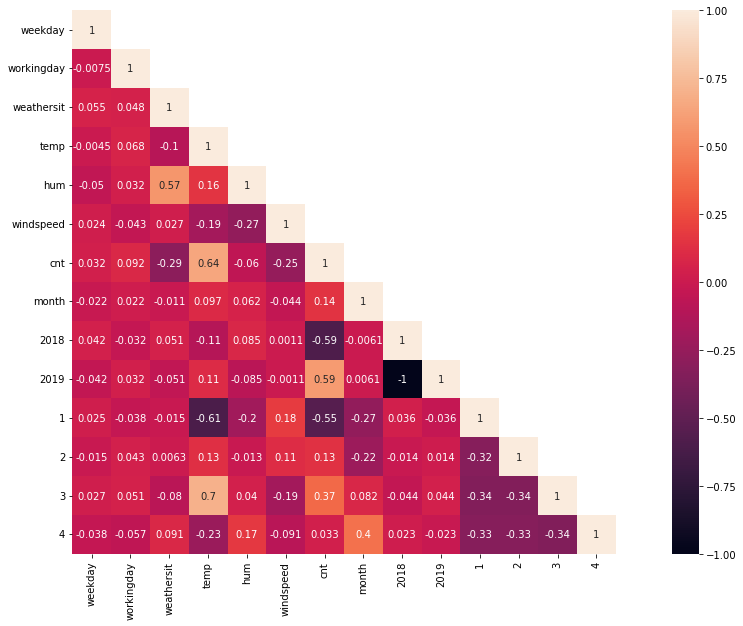

In [32]:
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cor, mask=mask,vmax=1, square=True,annot=True)

In [43]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train1 = sm.add_constant(X_train[['temp']])


In [46]:
lr1 = sm.OLS(y_train, X_train1)

lr_model1 = lr1.fit()
lr_model1.params

const    0.169798
temp     0.639952
dtype: float64

In [47]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           5.80e-61
Time:                        15:18:57   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#adding anoher varaible
X_train = df_train
X_train1 = X_train[['temp','hum']]
X_train1 = sm.add_constant(X_train1)

In [54]:
lr1 = sm.OLS(y_train, X_train1)

lr_model1 = lr1.fit()
lr_model1.params

const    0.320358
temp     0.665293
hum     -0.002601
dtype: float64

In [55]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     199.5
Date:                Tue, 20 Sep 2022   Prob (F-statistic):           1.25e-64
Time:                        15:27:42   Log-Likelihood:                 186.52
No. Observations:                 510   AIC:                            -367.0
Df Residuals:                     507   BIC:                            -354.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3204      0.036      8.803      0.000       0.249       0.392
temp           0.6653      0.033     19.891      0.000       0.600       0.731
hum           -0.0026      0.001     -4.875      0.000      -0.004      -0.002
==============================================================================
Omnibus:                        4.255   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.383
Skew:                           0.086   Prob(JB):                        0.184
Kurtosis:                       2.640   Cond. No.                         354.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Coefficient of temperature has increased by 0.02

Adding all variables to the model

In [58]:
df3.columns

Index([   'weekday', 'workingday', 'weathersit',       'temp',        'hum',
        'windspeed',        'cnt',      'month',         2018,         2019,
                  1,            2,            3,            4],
      dtype='object')

In [59]:
X_train = df_train

X_train1 = sm.add_constant(X_train)

In [60]:
lr1 = sm.OLS(y_train, X_train1)

lr_model1 = lr1.fit()
lr_model1.params

const         0.222015
weekday       0.008728
workingday    0.023301
weathersit   -0.160315
temp          0.487593
hum          -0.001149
windspeed    -0.006140
month         0.000428
2018         -0.006057
2019          0.228072
1            -0.032430
2             0.088109
3             0.040846
4             0.125491
dtype: float64

In [61]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     212.9
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          2.79e-180
Time:                        15:34:22   Log-Likelihood:                 482.45
No. Observations:                 510   AIC:                            -940.9
Df Residuals:                     498   BIC:                            -890.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2220      0.019     11.455      0.000       0.184       0.260
weekday        0.0087      0.002      4.140      0.000       0.005       0.013
workingday     0.0233      0.009      2.570      0.010       0.005       0.041
weathersit    -0.1603      0.020     -8.042      0.000      -0.199      -0.121
temp           0.4876      0.035     13.954      0.000       0.419       0.556
hum           -0.0011      0.000     -2.816      0.005      -0.002      -0.000
windspeed     -0.0061      0.001     -7.066      0.000      -0.008      -0.004
month          0.0004      0.001      0.314      0.753      -0.002       0.003
2018          -0.0061      0.011     -0.567      0.571      -0.027       0.015
2019           0.2281      0.011     21.695      0.000       0.207       0.249
1             -0.0324      0.010     -3.146      0.002      -0.053      -0.012
2              0.0881      0.010      9.163      0.000       0.069       0.107
3              0.0408      0.014      2.934      0.003       0.013       0.068
4              0.1255      0.010     12.407      0.000       0.106       0.145
==============================================================================
Omnibus:                       82.785   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              245.092
Skew:                          -0.768   Prob(JB):                     6.01e-54
Kurtosis:                       6.029   Cond. No.                     7.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.5e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Significance of P values for dropping variables and VIF

## VIF

In [66]:
vif = pd.DataFrame()
vif['Features'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\coep\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,2018,inf
9,2019,inf
10,1,inf
11,2,inf
12,3,inf
13,4,inf
6,cnt,5.55
3,temp,4.69
4,hum,1.96
2,weathersit,1.92


In [69]:
X = X_train.drop('month',1)

C:\Users\coep\AppData\Local\Temp\ipykernel_9396\1448956913.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_train.drop('month',1)


In [71]:
X_train1 = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train1)

lr_model1 = lr1.fit()
lr_model1.params

const         0.223368
weekday       0.008721
workingday    0.023428
weathersit   -0.160450
temp          0.488149
hum          -0.001151
windspeed    -0.006125
2018         -0.005374
2019          0.228742
1            -0.032689
2             0.087821
3             0.041270
4             0.126966
dtype: float64

In [72]:
vif = pd.DataFrame()
vif['Features'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(df3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\coep\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
8,2018,inf
9,2019,inf
10,1,inf
11,2,inf
12,3,inf
13,4,inf
6,cnt,5.55
3,temp,4.69
4,hum,1.96
2,weathersit,1.92


In [73]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     234.6
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          1.86e-181
Time:                        15:55:48   Log-Likelihood:                 482.40
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2234      0.019     11.830      0.000       0.186       0.260
weekday        0.0087      0.002      4.141      0.000       0.005       0.013
workingday     0.0234      0.009      2.588      0.010       0.006       0.041
weathersit    -0.1605      0.020     -8.058      0.000      -0.200      -0.121
temp           0.4881      0.035     14.000      0.000       0.420       0.557
hum           -0.0012      0.000     -2.824      0.005      -0.002      -0.000
windspeed     -0.0061      0.001     -7.066      0.000      -0.008      -0.004
2018          -0.0054      0.010     -0.515      0.607      -0.026       0.015
2019           0.2287      0.010     22.240      0.000       0.209       0.249
1             -0.0327      0.010     -3.184      0.002      -0.053      -0.013
2              0.0878      0.010      9.183      0.000       0.069       0.107
3              0.0413      0.014      2.982      0.003       0.014       0.068
4              0.1270      0.009     14.184      0.000       0.109       0.145
==============================================================================
Omnibus:                       82.115   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              242.442
Skew:                          -0.763   Prob(JB):                     2.26e-53
Kurtosis:                       6.014   Cond. No.                     7.45e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  4e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [75]:
X = X_train.drop('weathersit',1)

C:\Users\coep\AppData\Local\Temp\ipykernel_9396\1522303735.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_train.drop('weathersit',1)


In [76]:
X_train1 = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train1)

lr_model1 = lr1.fit()
lr_model1.params

const         0.273096
weekday       0.006957
workingday    0.019195
temp          0.547162
hum          -0.003188
windspeed    -0.007562
month         0.000664
2018          0.020855
2019          0.252240
1            -0.011774
2             0.098446
3             0.043448
4             0.142976
dtype: float64

In [77]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     202.0
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          2.70e-168
Time:                        15:58:01   Log-Likelihood:                 451.31
No. Observations:                 510   AIC:                            -880.6
Df Residuals:                     499   BIC:                            -834.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2731      0.019     14.044      0.000       0.235       0.311
weekday        0.0070      0.002      3.125      0.002       0.003       0.011
workingday     0.0192      0.010      1.997      0.046       0.000       0.038
temp           0.5472      0.036     15.089      0.000       0.476       0.618
hum           -0.0032      0.000     -9.383      0.000      -0.004      -0.003
windspeed     -0.0076      0.001     -8.370      0.000      -0.009      -0.006
month          0.0007      0.001      0.459      0.646      -0.002       0.004
2018           0.0209      0.011      1.938      0.053      -0.000       0.042
2019           0.2522      0.011     23.580      0.000       0.231       0.273
1             -0.0118      0.011     -1.110      0.267      -0.033       0.009
2              0.0984      0.010      9.729      0.000       0.079       0.118
3              0.0434      0.015      2.940      0.003       0.014       0.072
4              0.1430      0.010     13.630      0.000       0.122       0.164
==============================================================================
Omnibus:                       93.227   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.099
Skew:                          -0.917   Prob(JB):                     3.27e-52
Kurtosis:                       5.792   Cond. No.                     8.99e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.77e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [79]:
X = X_train.drop(['weekday', 'workingday', 'month', 'hum', 'weathersit', 'windspeed'], 1,)
X_train1 = sm.add_constant(X)
lr1 = sm.OLS(y_train, X_train1).fit()
lr1.summary()

C:\Users\coep\AppData\Local\Temp\ipykernel_9396\980873996.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_train.drop(['weekday', 'workingday', 'month', 'hum', 'weathersit', 'windspeed'], 1,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     293.6
Date:                Tue, 20 Sep 2022   Prob (F-statistic):          9.74e-147
Time:                        16:02:32   Log-Likelihood:                 386.38
No. Observations:                 510   AIC:                            -760.8
Df Residuals:                     504   BIC:                            -735.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1346      0.013     10.651      0.000       0.110       0.159
temp           0.5135      0.040     12.694      0.000       0.434       0.593
2018          -0.0522      0.008     -6.801      0.000      -0.067      -0.037
2019           0.1868      0.009     21.912      0.000       0.170       0.204
1             -0.0518      0.011     -4.716      0.000      -0.073      -0.030
2              0.0585      0.010      5.676      0.000       0.038       0.079
3              0.0295      0.016      1.802      0.072      -0.003       0.062
4              0.0984      0.009     11.176      0.000       0.081       0.116
==============================================================================
Omnibus:                      116.060   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              347.429
Skew:                          -1.072   Prob(JB):                     3.60e-76
Kurtosis:                       6.429   Cond. No.                     1.91e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\coep\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
1,2018,inf
2,2019,inf
3,1,inf
4,2,inf
5,3,inf
6,4,inf
0,temp,3.26


In [83]:
y_train_pred = lr1.predict(X_train1)

C:\Users\coep\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

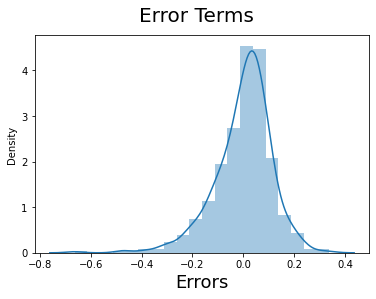

In [84]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Evaluation of Model

Text(0, 0.5, 'y_train_pred')

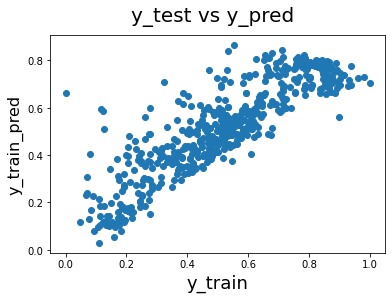

In [85]:
fig = plt.figure()
plt.scatter(y_train,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_pred', fontsize=16)                          # Y-label

Prediction and evaluation of Test model

In [86]:
num_vars = ['temp', 'weathersit', 'cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,weekday,workingday,weathersit,temp,hum,windspeed,cnt,month,2018,2019,1,2,3,4
184,1,0,2.0,29.793347,63.7917,5.459106,6043.0,4,1,0,0,0,1,0
535,3,1,1.0,32.082500,59.2083,7.625404,6211.0,6,0,1,0,1,0,0
299,4,1,2.0,19.270000,81.2917,13.250121,2659.0,10,1,0,0,0,0,1
221,3,1,1.0,31.433347,42.4167,13.417286,4780.0,10,1,0,0,0,1,0
152,4,1,1.0,29.315000,30.5000,19.583229,4968.0,2,1,0,0,1,0,0


In [101]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test = sm.add_constant(X_test)
X_test.head()

KeyError: 'cnt'

In [100]:
X_test

,const,temp,2018,2019,1,2,3,4
184,1.0,29.793347,1,0,0,0,1,0
535,1.0,32.082500,0,1,0,1,0,0
299,1.0,19.270000,1,0,0,0,0,1
221,1.0,31.433347,1,0,0,0,1,0
152,1.0,29.315000,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
400,1.0,10.899153,0,1,1,0,0,0
702,1.0,19.509153,0,1,0,0,0,1
127,1.0,21.661653,1,0,0,1,0,0
640,1.0,26.957500,0,1,0,0,0,1


In [99]:
#Predict
y_test_pred = lr_model.predict(X_test)

ValueError: shapes (219,8) and (2,) not aligned: 8 (dim 1) != 2 (dim 0)

In [91]:
# Evaluate
r2_score(y_true = y_test,y_pred =y_test_pred)

NameError: name 'y_test_pred' is not defined